In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,precision_recall_curve
from lightgbm import LGBMClassifier
from sklearn.metrics import multilabel_confusion_matrix
import scikitplot as skplt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [6]:
df=pd.read_csv('predictive_maintenance.csv')

In [7]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [8]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
encoded_results_1 = labelbinarizer.fit_transform(df["Failure Type"])

In [9]:
encoded_results_1

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [10]:
df_encoded_1 = pd.DataFrame(encoded_results_1,columns=labelbinarizer.classes_)

In [11]:
encoded_results_2 = labelbinarizer.fit_transform(df["Type"])

In [12]:
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)

In [13]:
df1 = pd.concat([df,df_encoded_1, df_encoded_2], axis=1)

In [14]:
df1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0,1,0,0,0,0,0,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0,1,0,0,0,0,1,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0,1,0,0,0,0,0,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0,1,0,0,0,0,1,0,0


In [15]:
df1.drop(['Product ID',"UDI","Type","Failure Type"], axis=1, inplace=True)

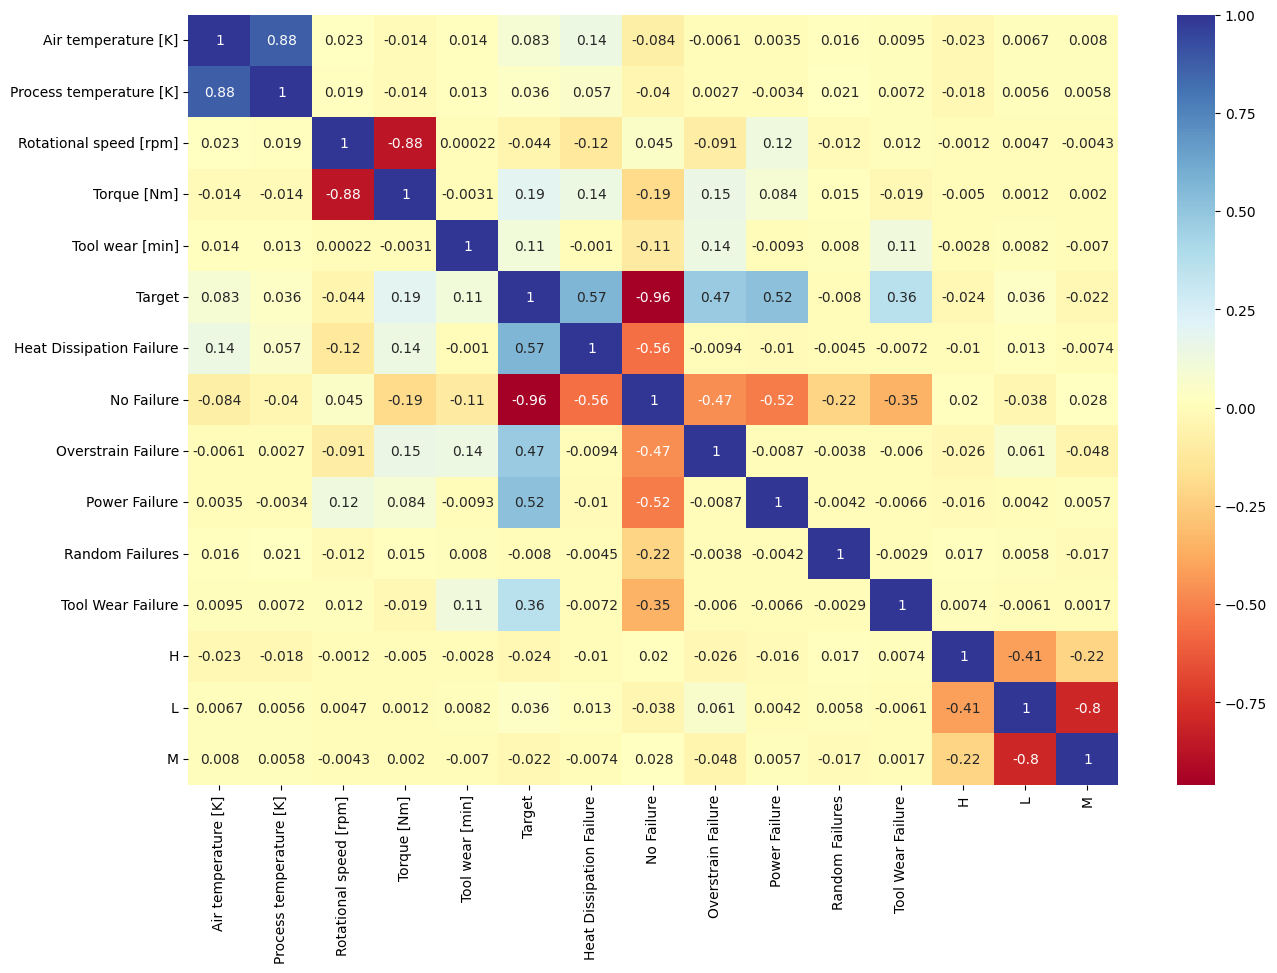

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

In [20]:
df1.isnull().values.any()

False

In [21]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


In [22]:
DF = df1[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','H','L','M','Target','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
 'Random Failures']]

In [23]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [24]:
DF.columns=DF.columns.astype("str")
col_name=DF.columns.to_list()
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'H',
 'L',
 'M',
 'Target',
 'No Failure',
 'Heat Dissipation Failure',
 'Overstrain Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Random Failures']

In [25]:
DF = DF.reset_index(drop=True)
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [26]:
X = DF.values[:, 0:8].astype("float")
y = DF.values[:,8:].astype("uint8")
print(X.shape)
print(y.shape)

(10000, 8)
(10000, 7)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [28]:
y_train.shape

(6700, 7)

In [29]:
y_test.shape

(3300, 7)

In [30]:
scaler = StandardScaler().fit(X_test)
lgbm = LGBMClassifier()
from sklearn.multioutput import ClassifierChain
model_lgb = MultiOutputClassifier(estimator=lgbm,n_jobs=None)
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)
model_lgb_pred = chain_lgbm.fit(X_train, y_train)
print(model_lgb_pred.score(X_test,y_test))

[LightGBM] [Info] Number of positive: 13, number of negative: 6687
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001940 -> initscore=-6.242971
[LightGBM] [Info] Start training from score -6.242971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [31]:
yhat_lgb = model_lgb_pred.predict(X_test)

In [32]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_lgb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_lgb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_lgb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_lgb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_lgb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_lgb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_lgb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_lgb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_lgb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_lgb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_lgb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_lgb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_lgb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_lgb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_lgb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_lgb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_lgb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_lgb[:,5])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,6],yhat_lgb[:,6])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,6],yhat_lgb[:,6])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,6],yhat_lgb[:,6])))

Accuracy Score: 0.9882
Average Precision Score: 0.6385
Matthews correlation coefficient: 0.7872
Accuracy Score: 0.9882
Average Precision Score: 0.9894
Matthews correlation coefficient: 0.7872
Accuracy Score: 0.9988
Average Precision Score: 0.8629
Matthews correlation coefficient: 0.9280
Accuracy Score: 0.9973
Average Precision Score: 0.6633
Matthews correlation coefficient: 0.8118
Accuracy Score: 0.9964
Average Precision Score: 0.6410
Matthews correlation coefficient: 0.7970
Accuracy Score: 0.9955
Average Precision Score: 0.0036
Matthews correlation coefficient: -0.0018
Accuracy Score: 0.9985
Average Precision Score: 0.0015
Matthews correlation coefficient: 0.0000


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3196
           1       0.93      0.67      0.78       104

    accuracy                           0.99      3300
   macro avg       0.96      0.84      0.89      3300
weighted avg       0.99      0.99      0.99      3300



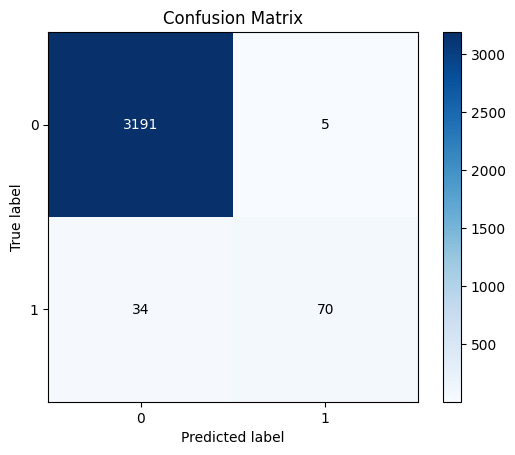

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       104
           1       0.99      1.00      0.99      3196

    accuracy                           0.99      3300
   macro avg       0.96      0.84      0.89      3300
weighted avg       0.99      0.99      0.99      3300



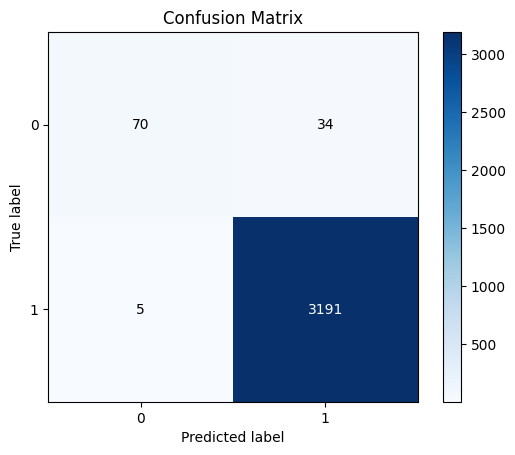

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3272
           1       0.93      0.93      0.93        28

    accuracy                           1.00      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       1.00      1.00      1.00      3300



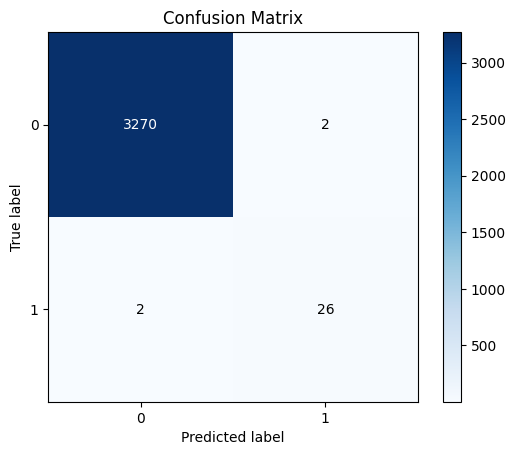

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3274
           1       0.90      0.73      0.81        26

    accuracy                           1.00      3300
   macro avg       0.95      0.87      0.90      3300
weighted avg       1.00      1.00      1.00      3300



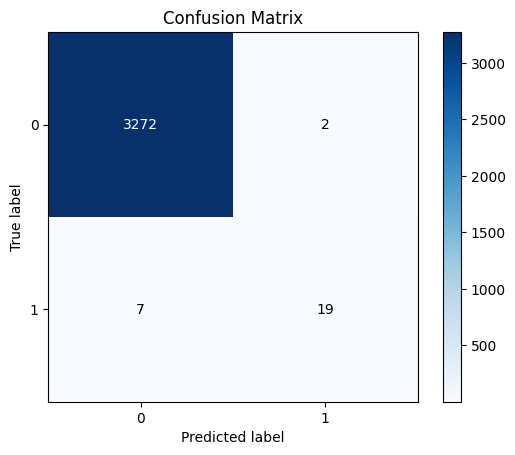

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3267
           1       0.96      0.67      0.79        33

    accuracy                           1.00      3300
   macro avg       0.98      0.83      0.89      3300
weighted avg       1.00      1.00      1.00      3300



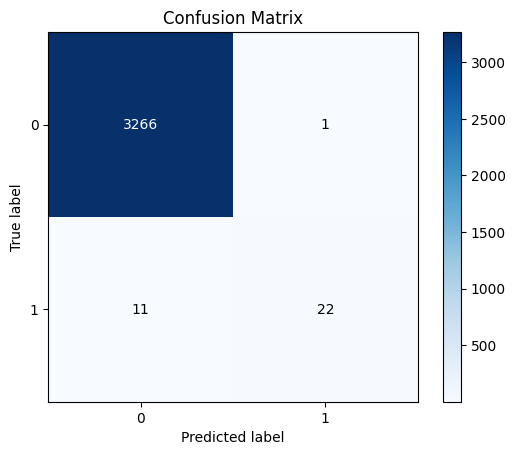

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3288
           1       0.00      0.00      0.00        12

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



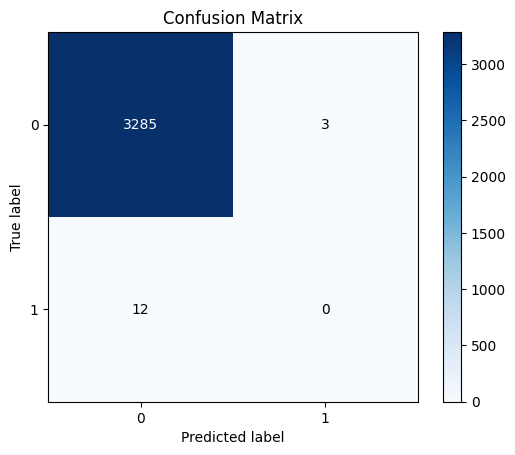

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3295
           1       0.00      0.00      0.00         5

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       1.00      1.00      1.00      3300



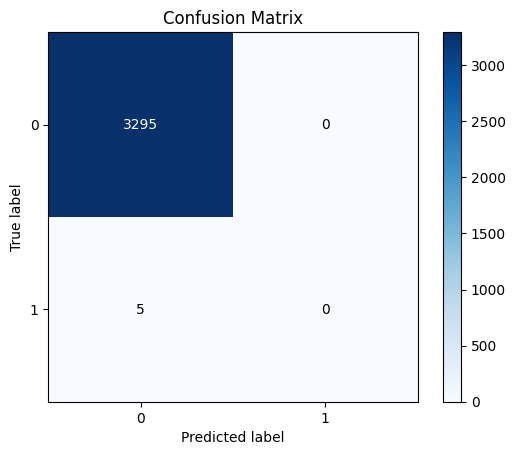

In [33]:
print(classification_report(y_test[:,0],yhat_lgb[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_lgb[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_lgb[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_lgb[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_lgb[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_lgb[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_lgb[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_lgb[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_lgb[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_lgb[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_lgb[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_lgb[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_lgb[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_lgb[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_lgb[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_lgb[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_lgb[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_lgb[:,5], normalize=False)
plt.show()
print(classification_report(y_test[:,6],yhat_lgb[:,6]))
tn, fp, fn, tp = confusion_matrix(y_test[:,6],yhat_lgb[:,6]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,6],yhat_lgb[:,6], normalize=False)
plt.show()

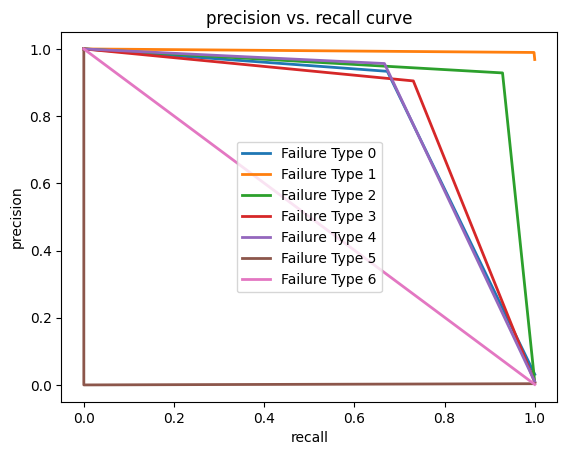

In [34]:
precision = dict()
recall = dict()
n_classes = 7
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_lgb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [35]:
rand = RandomForestClassifier()
rf = MultiOutputClassifier(estimator=rand)

In [36]:
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9751515151515151


In [37]:
yhat_rand = rf.predict(X_test)

In [38]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_rand[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_rand[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_rand[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_rand[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_rand[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_rand[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_rand[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_rand[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_rand[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_rand[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_rand[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_rand[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_rand[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_rand[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_rand[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_rand[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_rand[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_rand[:,5])))

Accuracy Score: 0.9806
Average Precision Score: 0.4106
Matthews correlation coefficient: 0.6193
Accuracy Score: 0.9833
Average Precision Score: 0.9848
Matthews correlation coefficient: 0.6835
Accuracy Score: 0.9955
Average Precision Score: 0.4709
Matthews correlation coefficient: 0.6814
Accuracy Score: 0.9945
Average Precision Score: 0.3254
Matthews correlation coefficient: 0.5640
Accuracy Score: 0.9955
Average Precision Score: 0.5512
Matthews correlation coefficient: 0.7377
Accuracy Score: 0.9964
Average Precision Score: 0.0036
Matthews correlation coefficient: 0.0000


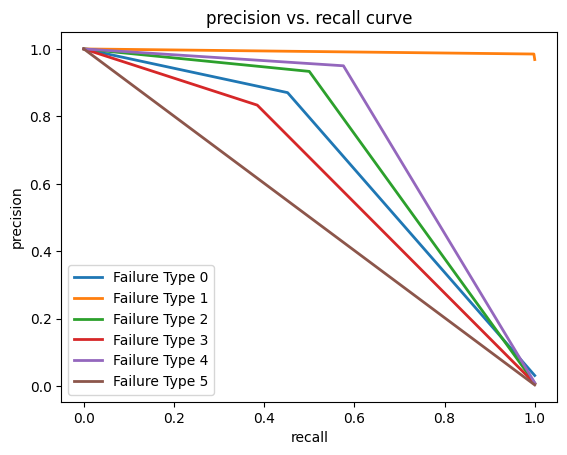

In [39]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_rand[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3196
           1       0.87      0.45      0.59       104

    accuracy                           0.98      3300
   macro avg       0.93      0.72      0.79      3300
weighted avg       0.98      0.98      0.98      3300



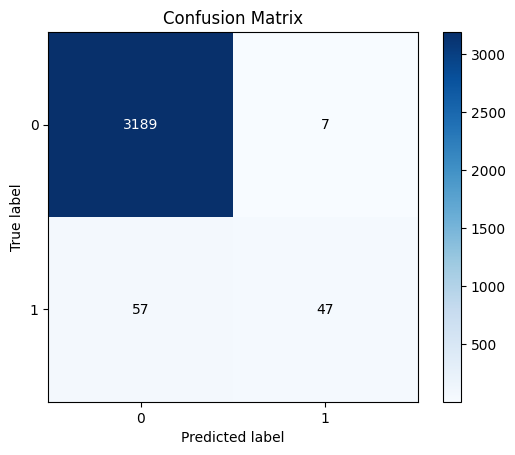

              precision    recall  f1-score   support

           0       0.90      0.53      0.67       104
           1       0.98      1.00      0.99      3196

    accuracy                           0.98      3300
   macro avg       0.94      0.76      0.83      3300
weighted avg       0.98      0.98      0.98      3300



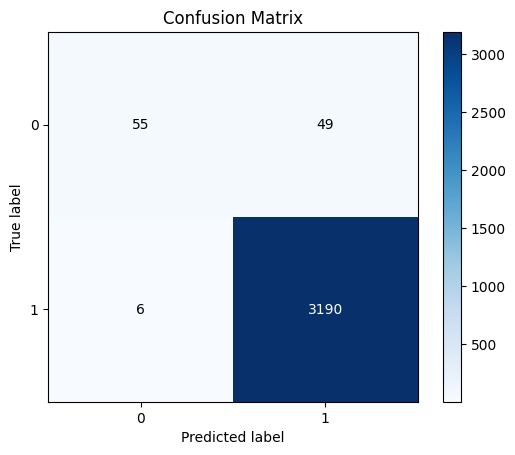

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3272
           1       0.93      0.50      0.65        28

    accuracy                           1.00      3300
   macro avg       0.96      0.75      0.82      3300
weighted avg       1.00      1.00      0.99      3300



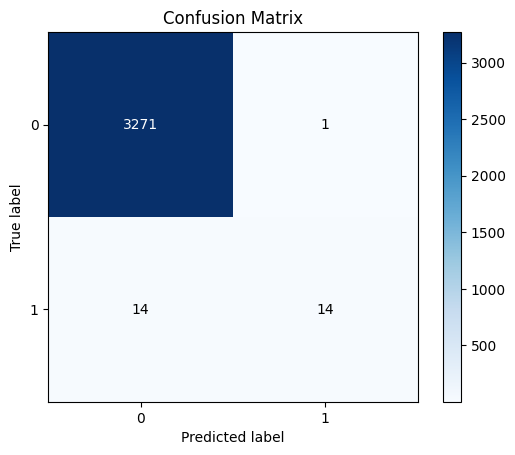

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3274
           1       0.83      0.38      0.53        26

    accuracy                           0.99      3300
   macro avg       0.91      0.69      0.76      3300
weighted avg       0.99      0.99      0.99      3300



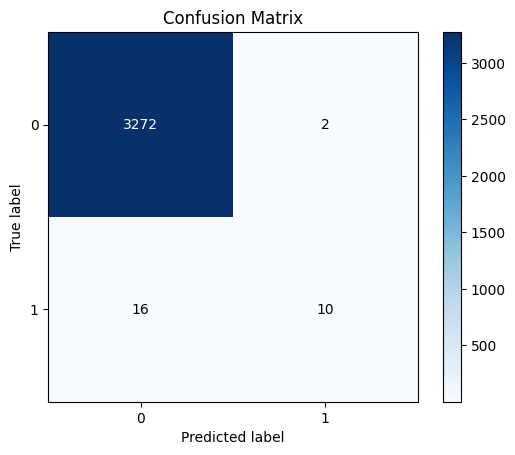

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3267
           1       0.95      0.58      0.72        33

    accuracy                           1.00      3300
   macro avg       0.97      0.79      0.86      3300
weighted avg       1.00      1.00      0.99      3300



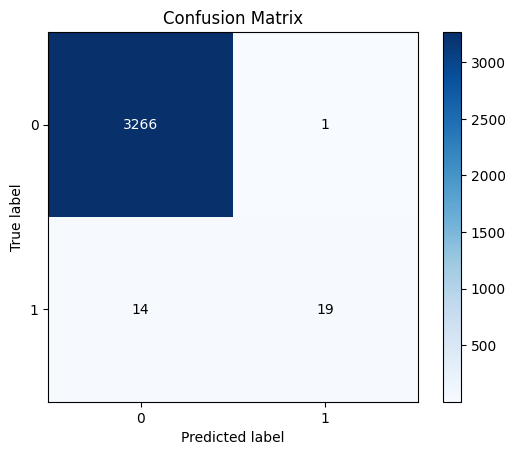

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3288
           1       0.00      0.00      0.00        12

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



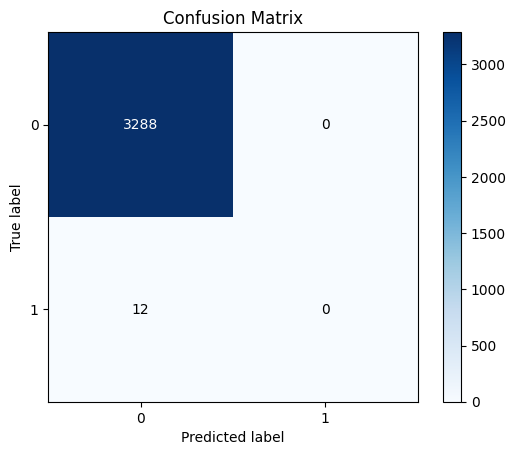

In [40]:
print(classification_report(y_test[:,0],yhat_rand[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_rand[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_rand[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_rand[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_rand[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_rand[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_rand[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_rand[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_rand[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_rand[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_rand[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_rand[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_rand[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_rand[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_rand[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_rand[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_rand[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_rand[:,5], normalize=False)
plt.show()

In [41]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [42]:
from catboost import CatBoostClassifier, Pool, cv

In [43]:
catb = CatBoostClassifier()
model_catb = MultiOutputClassifier(estimator=catb)

In [44]:
model_catb.fit(X_train, y_train)
print(model_catb.score(X_test, y_test))

Streaming output truncated to the last 5000 lines.
5:	learn: 0.3843275	total: 20.4ms	remaining: 3.38s
6:	learn: 0.3582492	total: 23.6ms	remaining: 3.35s
7:	learn: 0.3292712	total: 26.6ms	remaining: 3.29s
8:	learn: 0.2969296	total: 29.5ms	remaining: 3.24s
9:	learn: 0.2706720	total: 32.3ms	remaining: 3.2s
10:	learn: 0.2478309	total: 35.3ms	remaining: 3.17s
11:	learn: 0.2293633	total: 38.2ms	remaining: 3.15s
12:	learn: 0.2099023	total: 41.4ms	remaining: 3.14s
13:	learn: 0.1965582	total: 44.3ms	remaining: 3.12s
14:	learn: 0.1790230	total: 47.6ms	remaining: 3.13s
15:	learn: 0.1665210	total: 50.6ms	remaining: 3.11s
16:	learn: 0.1560860	total: 53.5ms	remaining: 3.09s
17:	learn: 0.1432050	total: 56.5ms	remaining: 3.08s
18:	learn: 0.1330449	total: 59.5ms	remaining: 3.07s
19:	learn: 0.1275735	total: 61.7ms	remaining: 3.02s
20:	learn: 0.1167949	total: 64.9ms	remaining: 3.02s
21:	learn: 0.1122894	total: 68ms	remaining: 3.02s
22:	learn: 0.1071673	total: 71.3ms	remaining: 3.03s
23:	learn: 0.0996783	

In [45]:
yhat_catb = model_catb.predict(X_test)

In [46]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_catb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_catb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_catb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_catb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_catb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_catb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_catb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_catb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_catb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_catb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_catb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_catb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_catb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_catb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_catb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_catb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_catb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_catb[:,5])))

Accuracy Score: 0.9836
Average Precision Score: 0.5009
Matthews correlation coefficient: 0.6904
Accuracy Score: 0.9830
Average Precision Score: 0.9848
Matthews correlation coefficient: 0.6777
Accuracy Score: 0.9997
Average Precision Score: 0.9646
Matthews correlation coefficient: 0.9818
Accuracy Score: 0.9964
Average Precision Score: 0.5585
Matthews correlation coefficient: 0.7438
Accuracy Score: 0.9958
Average Precision Score: 0.5800
Matthews correlation coefficient: 0.7572
Accuracy Score: 0.9961
Average Precision Score: 0.0036
Matthews correlation coefficient: -0.0011


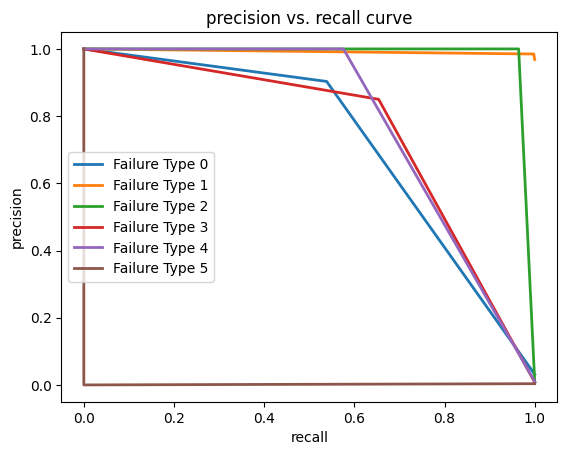

In [47]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_catb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3196
           1       0.90      0.54      0.67       104

    accuracy                           0.98      3300
   macro avg       0.94      0.77      0.83      3300
weighted avg       0.98      0.98      0.98      3300



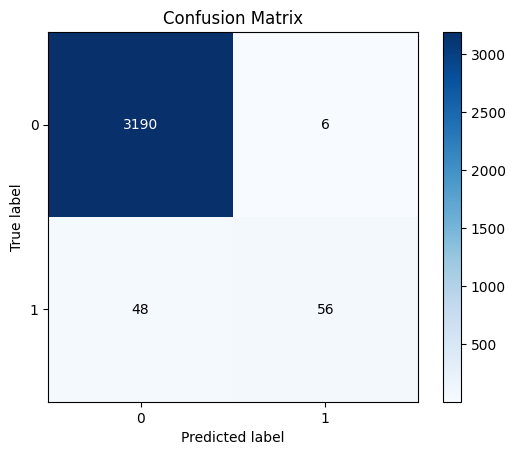

              precision    recall  f1-score   support

           0       0.89      0.53      0.66       104
           1       0.98      1.00      0.99      3196

    accuracy                           0.98      3300
   macro avg       0.94      0.76      0.83      3300
weighted avg       0.98      0.98      0.98      3300



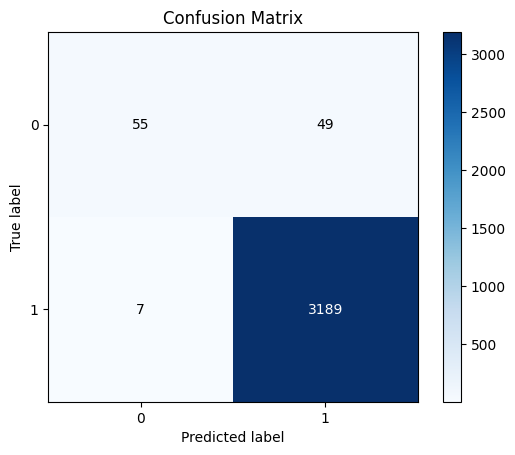

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3272
           1       1.00      0.96      0.98        28

    accuracy                           1.00      3300
   macro avg       1.00      0.98      0.99      3300
weighted avg       1.00      1.00      1.00      3300



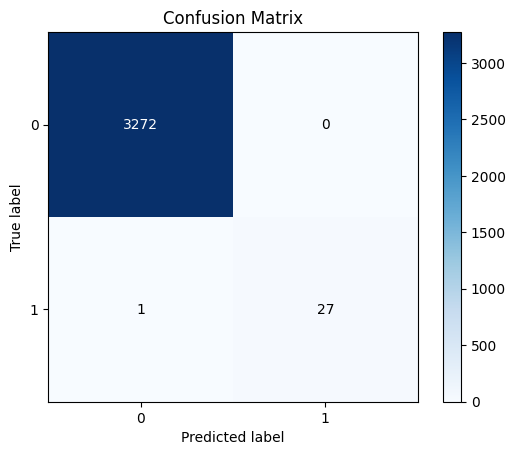

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3274
           1       0.85      0.65      0.74        26

    accuracy                           1.00      3300
   macro avg       0.92      0.83      0.87      3300
weighted avg       1.00      1.00      1.00      3300



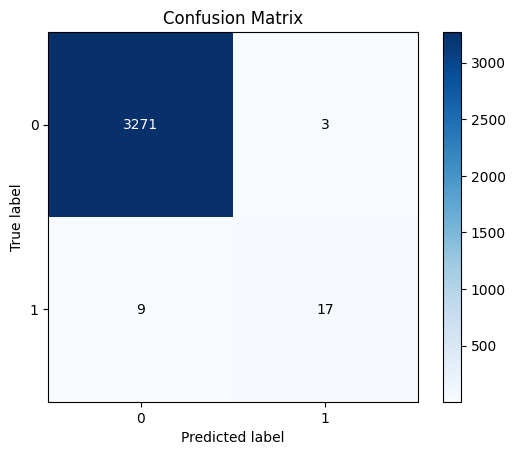

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3267
           1       1.00      0.58      0.73        33

    accuracy                           1.00      3300
   macro avg       1.00      0.79      0.86      3300
weighted avg       1.00      1.00      1.00      3300



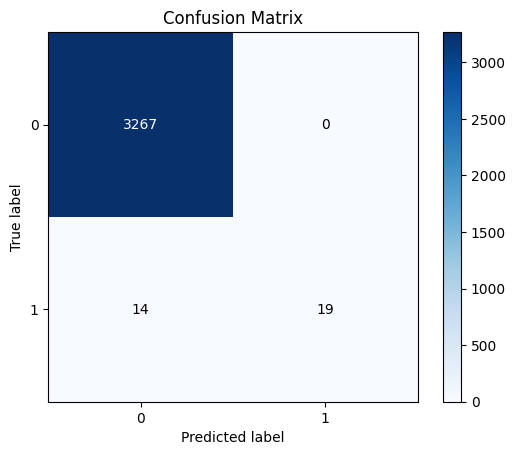

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3288
           1       0.00      0.00      0.00        12

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



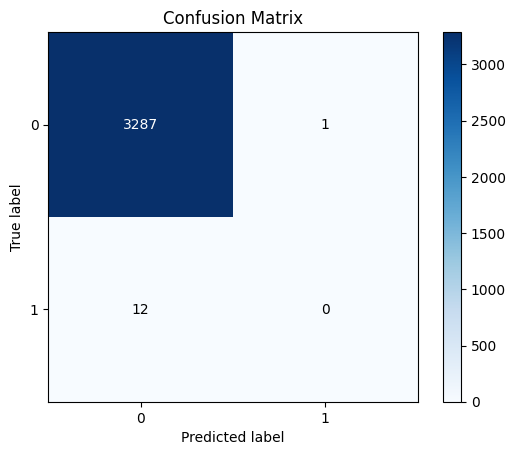

In [48]:
print(classification_report(y_test[:,0],yhat_catb[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_catb[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_catb[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_catb[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_catb[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_catb[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_catb[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_catb[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_catb[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_catb[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_catb[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_catb[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_catb[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_catb[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_catb[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_catb[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_catb[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_catb[:,5], normalize=False)
plt.show()